  0%|          | 0/10.0 [00:00<?, ?it/s]

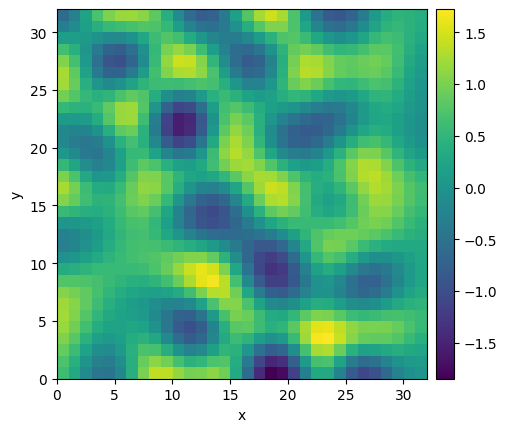

In [1]:
from pde import PDEBase, ScalarField, UnitGrid


class KuramotoSivashinskyPDE(PDEBase):
    """Implementation of the normalized Kuramoto–Sivashinsky equation"""

    def evolution_rate(self, state, t=0):
        """implement the python version of the evolution equation"""
        state_lap = state.laplace(bc="auto_periodic_neumann")
        state_lap2 = state_lap.laplace(bc="auto_periodic_neumann")
        state_grad = state.gradient(bc="auto_periodic_neumann")
        return -state_grad.to_scalar("squared_sum") / 2 - state_lap - state_lap2


grid = UnitGrid([32, 32])  # generate grid
state = ScalarField.random_uniform(grid)  # generate initial condition

eq = KuramotoSivashinskyPDE()  # define the pde
result = eq.solve(state, t_range=10, dt=0.01)
result.plot()

In [2]:
# # two different conditions for lower and upper end of x-axis
# bc_x = [{"derivative": 0.1}, {"value": "sin(y / 2)"}]
# # the same condition on the lower and upper end of the y-axis
# bc_y = {"value": "sqrt(1 + cos(x))"}

# grid = UnitGrid([32, 32])
# field = pde.ScalarField(grid)
# field.laplace(bc=[bc_x, bc_y])

In [3]:
"cos(x/16)(1+sin(x/16))"

'cos(x/16)(1+sin(x/16))'

In [4]:
result.data.shape

(32, 32)